# 1. Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Tutorials I watched along the way
#https://www.youtube.com/watch?v=UqmulHG4IvY&t=951s

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

#Handle warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Load and Inspect Data
* test.csv and train.csv loaded
* Add additional column to test to allow concat of data sets for category encoding and scaling prior to predictions

In [3]:
#Data Loading to DataFrames
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

In [4]:
#Verifying shape and column names for train and test data
print(train.shape)
print(train.columns)
print(test.shape)
print(test.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [5]:
#Review data types for each field
print(train.info())
#print(train['GarageYrBlt'].value_counts())

#I would like to convert data type for GarageYrBlt to int, but with 81 missing values corresponding with no garage data point, I am selecting to leave it as a string object for now


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2-a. Missing Data Review

In [6]:
# Checking for null values and determining how to handle them

#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_colwidth', 50)
#train[train.isnull().sum()>0].sum()
print('List of NaN value counts:')
missing_counts = train.isnull().sum()
print(missing_counts[missing_counts > 0])

#checking for duplicates
print('\n\nCount of Duplicate Rows:')
train.duplicated().sum()

List of NaN value counts:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Count of Duplicate Rows:


0

In [7]:
#Created a quick function to make individual variables easier to quick view
def show_stats_num(col):
    print(col.describe())
    print('\n\n')
    print(col.value_counts())
    plt.clf()
    sns.boxplot(x=col)
    plt.show()

def show_stats_cat(df, col):
    print(df[col].value_counts())
    plt.clf()
    sns.histplot(df, x=col)
    plt.show()

#show_stats_num(train.LotFrontage)
    
#show_stats_cat(train, 'Alley')
    
#show_stats_cat(train, 'MasVnrType')
    
#show_stats_num(train.MasVnrArea)
    
#show_stats_cat(train, 'BsmtQual')
#print(train[train['BsmtQual'].isna()][['BsmtQual', 'BsmtCond', 'BsmtExposure']])
    
#show_stats_cat(train, 'BsmtCond')
#print(train[train['BsmtCond'].isna()][['BsmtQual', 'BsmtCond', 'BsmtExposure']])
    
#show_stats_cat(train, 'BsmtExposure')
#print(train[train['BsmtExposure'].isna()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']])
    
#show_stats_cat(train, 'BsmtFinType1')
#print(train[train['BsmtFinType1'].isna()][['BsmtFinType1', 'BsmtFinSF1']])

#show_stats_cat(train, 'BsmtFinType2')
#print(train[train['BsmtFinType2'].isna()][['BsmtFinType2', 'BsmtFinSF2']])

#show_stats_cat(train, 'Electrical')

#show_stats_cat(train, 'FireplaceQu')
#pd.set_option('display.max_rows', 50)
#print(train[train['FireplaceQu'].isna()][['FireplaceQu', 'Fireplaces']])

#show_stats_cat(train, 'GarageType')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageType'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'GarageYrBlt')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageYrBlt'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'GarageFinish')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageFinish'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'GarageCond')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageCond'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'PoolQC')
#print(train[(train['PoolQC'].isnull()) & (train['PoolArea']==0)].shape)

#show_stats_cat(train, 'Fence')

#show_stats_cat(train, 'MiscFeature')

## 2-b Missing Data Handling Details
* LotFrontage (259)
    * Def: Linear feet of street connected to property
    * Decision: Fill with Median (less affected by outliers in data set)
* Alley (1369)
    * Def: Type of alley access
    * Assumption Taken: Most locations have no entry (1369 / 1460), indicating this field is MNAR (Missing Not At Random)
    * Decision: Fill with 'None'
* MasVnrType (872)
    * Def: Masonry veneer type
    * Assumption Taken: Over 1/2 of locations do not have this entry (872 / 1460), indicating this field is MNAR (Missing Not At Random)
    * Decision: Fill with 'None'
* MasVnrArea (8)
    * Def: Masonry veneer area in square feet
    * Assumption Taken: This value is depending on the location having a veneer in the first place, indicating this field is MNAR (Missing Not At Random)
    * Decision: Fill with 0
* BsmtQual (37)
    * Def: Height of the basement
    * Note: All missing records are paired with other Basement null instances and are less than 5% of data set. Context indicates these are homes without basements due to missing data.
    * Decision: Fill with 'None'
* BsmtCond (37)
    * Def: General condition of the basement
    * Note: All missing records are paired with other Basement null instances and are less than 5% of data set. Context indicates these are homes without basements due to missing data.
    * Decision: Fill with 'None'
* BsmtExposure (38)
    * Def: Walkout or garden level basement walls
    * Note: All (except 1) missing records are paired with other Basement null instances and are less than 5% of data set. Context indicates these are homes without basements due to missing data.
    * Assumption Taken: Data is MNAR (Missing Not At Random), meaning that missing values indicate there was nothing to prompt a recording and should have been marked as No
    * Decision: Fill with 'None'
* BsmtFinType1 (37)
    * Def: Quality of basement finished area
    * Note: Missing data is less than 5% of data set. BsmtFinType1 with null also have 0 square footage
    * Decision: Fill with 'None' 
* BsmtFinType2 (38)
    * Def: Quality of second finished area (if present)
    * Note: Missing data is less than 5% of data set. BsmtFinType2 with null (except 1 entry) have 0 square footage
    * Decision: Fill with 'None', remove index 332 (outlier data: basement SF without basement type)
* Electrical (1)
    * Def: Electrical system
    * Note: Missing data is only 1 record, therefore will fill with the 'Mode' of the data set
    * Assumption: SBrkr stands for Standard Breaker
    * Decision: Fill with 'SBrkr'
* FireplaceQu (690)
    * Def: Fireplace quality
    * Note: All missing records are paired with count of 0 Fireplaces. Missing data is almost 50% (690 / 1460) of data set.
    * Decision: Fill with 'No Fireplace'
* GarageType (81)
    * Def: Garage location
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageYrBlt (81)
    * Def: Year garage was built
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageFinish (81)
    * Def: Interior finish of the garage
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageQual (81)
    * Def: Garage quality
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageCond (81)
    * Def: Garage condition
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* PoolQC (1453)
    * Def: Pool quality
    * Note: All records missing PoolQC have a PoolArea value of 0. Missing data is almost the complete data set (1453 / 1460)
    * Decision: Ignore in models, not enough data to use as a predictor
* Fence (1179)
    * Def: Fence quality
    * Note: Missing data is ~81% of the data set (1453 / 1460), but based on context likely means no fence on property.
    * Assumption Taken: Data is MNAR (Missing Not At Random), meaning that missing values indicate there was nothing to prompt a recording and should have been marked as No Fence
    * Decision: Fill with 'No Fence'
* MiscFeature (1406)
    * Def: Miscellaneous feature not covered in other categories
    * Note: Missing data is almost the complete data set (1406 / 1460)
    * Decision: Ignore in models, not enough data to use as a predictor
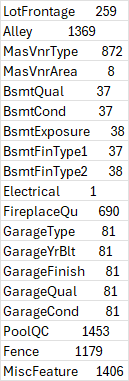
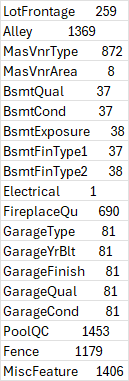
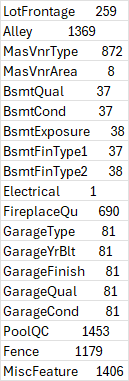
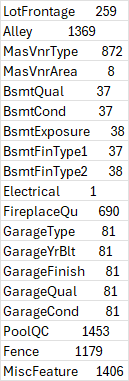

In [8]:
#Data clean up using conclusions from above
train['LotFrontage'].fillna(0, inplace=True) #Fill with Median
train['Alley'].fillna('None', inplace=True) #Fill with None
train['MasVnrType'].fillna('None', inplace=True) #Fill with None
train['MasVnrArea'].fillna(0, inplace=True) #Fill with 0
train['BsmtQual'].fillna('None', inplace=True) #Fill with None
train['BsmtCond'].fillna('None', inplace=True) #Fill with None
train['BsmtExposure'].fillna('None', inplace=True) #Fill with None
train['BsmtFinType1'].fillna('None', inplace=True) #Fill with None
train['BsmtFinType2'].fillna('None', inplace=True) #Fill with None
train['Electrical'].fillna('SBrkr', inplace=True) #Fill with SBrkr
train['FireplaceQu'].fillna('No Fireplace', inplace=True) #Fill with No Fireplace
train['GarageType'].fillna('No Garage', inplace=True) #Fill with No Garage
train['GarageYrBlt'].fillna('No Garage', inplace=True) #Fill with No Garage
train['GarageFinish'].fillna('No Garage', inplace=True) #Fill with No Garage
train['GarageQual'].fillna('No Garage', inplace=True) #Fill with No Garage
train['GarageCond'].fillna('No Garage', inplace=True) #Fill with No Garage
train['Fence'].fillna('No Fence', inplace=True) #Fill with No Fence

test['LotFrontage'].fillna(0, inplace=True) #Fill with Median
test['Alley'].fillna('None', inplace=True) #Fill with None
test['MasVnrType'].fillna('None', inplace=True) #Fill with None
test['MasVnrArea'].fillna(0, inplace=True) #Fill with 0
test['BsmtQual'].fillna('None', inplace=True) #Fill with None
test['BsmtCond'].fillna('None', inplace=True) #Fill with None
test['BsmtExposure'].fillna('None', inplace=True) #Fill with None
test['BsmtFinType1'].fillna('None', inplace=True) #Fill with None
test['BsmtFinType2'].fillna('None', inplace=True) #Fill with None
test['Electrical'].fillna('SBrkr', inplace=True) #Fill with SBrkr
test['FireplaceQu'].fillna('No Fireplace', inplace=True) #Fill with No Fireplace
test['GarageType'].fillna('No Garage', inplace=True) #Fill with No Garage
test['GarageYrBlt'].fillna('No Garage', inplace=True) #Fill with No Garage
test['GarageFinish'].fillna('No Garage', inplace=True) #Fill with No Garage
test['GarageQual'].fillna('No Garage', inplace=True) #Fill with No Garage
test['GarageCond'].fillna('No Garage', inplace=True) #Fill with No Garage
test['Fence'].fillna('No Fence', inplace=True) #Fill with No Fence


In [9]:
#Check for nulls now that data cleaning is completed
missing_counts = train.isnull().sum()
print(missing_counts[missing_counts > 0])

PoolQC         1453
MiscFeature    1406
dtype: int64


# 3. EDA + Charts
* Visual explorations of the data looking for indications of data distributions and basic relationships
    * Distribution Findings (Normal Curve Shape): LotFrontage, OverallQual, OverallCond, TotalBsmtSF, 1stFlrSF, GrLivArea, BedroomAbvGr, TotRmsAbvGrd, MoSold
    * Scatter Findings (Linear Relationship Indications vs. SalePrice): LotFrontage, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea
    * Correlation Findings (> .5 Relationship): OverallQual, GrLivArea, TotalBsmtSF, 1stFlrSF, FullBath, GarageCars, GarageArea

In [10]:
#Splitting data sets into numeric and categorical for investigation
print('Numeric Columns:')
train_numeric = train.select_dtypes(include='number')
print(train_numeric.columns)

print('\n\nCategorical Columns')
train_categorical = train.select_dtypes(exclude='number')
print(train_categorical.columns)

Numeric Columns:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Categorical Columns
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinTyp

## 3-a. vs. Price Scatter Plots

In [11]:
#Chart histrogram distributions of all numeric datasets for an initial look
#I'm enumerating here because I want to count through the columns, ignore columns 1 (user id) and also map these to a figure / flattened axes
# plt.clf()
# fig, axes = plt.subplots(12,3,figsize=(20, 50))
# axes = axes.flatten()

# #Dropping the Id and SalePrice Fields since I'm only concerned with checking histo distributions of the training data here
# num_chart_data = train_numeric.drop(columns=['Id', 'SalePrice'])

# for i, col in enumerate(num_chart_data.columns):
#     sns.histplot(num_chart_data, x=col, ax = axes[i])
#     axes[i].set_title(col +' Distribution', fontweight='bold')
#     axes[i].set_xlabel(col, fontweight='bold')
#     axes[i].set_ylabel('Count of Records', fontweight='bold')

# plt.tight_layout()
# plt.show()

#Distro Findings (Normal Curve Shape): LotFrontage, OverallQual, OverallCond, TotalBsmtSF, 1stFlrSF, GrLivArea, BedroomAbvGr, TotRmsAbvGrd, MoSold

<Figure size 640x480 with 0 Axes>

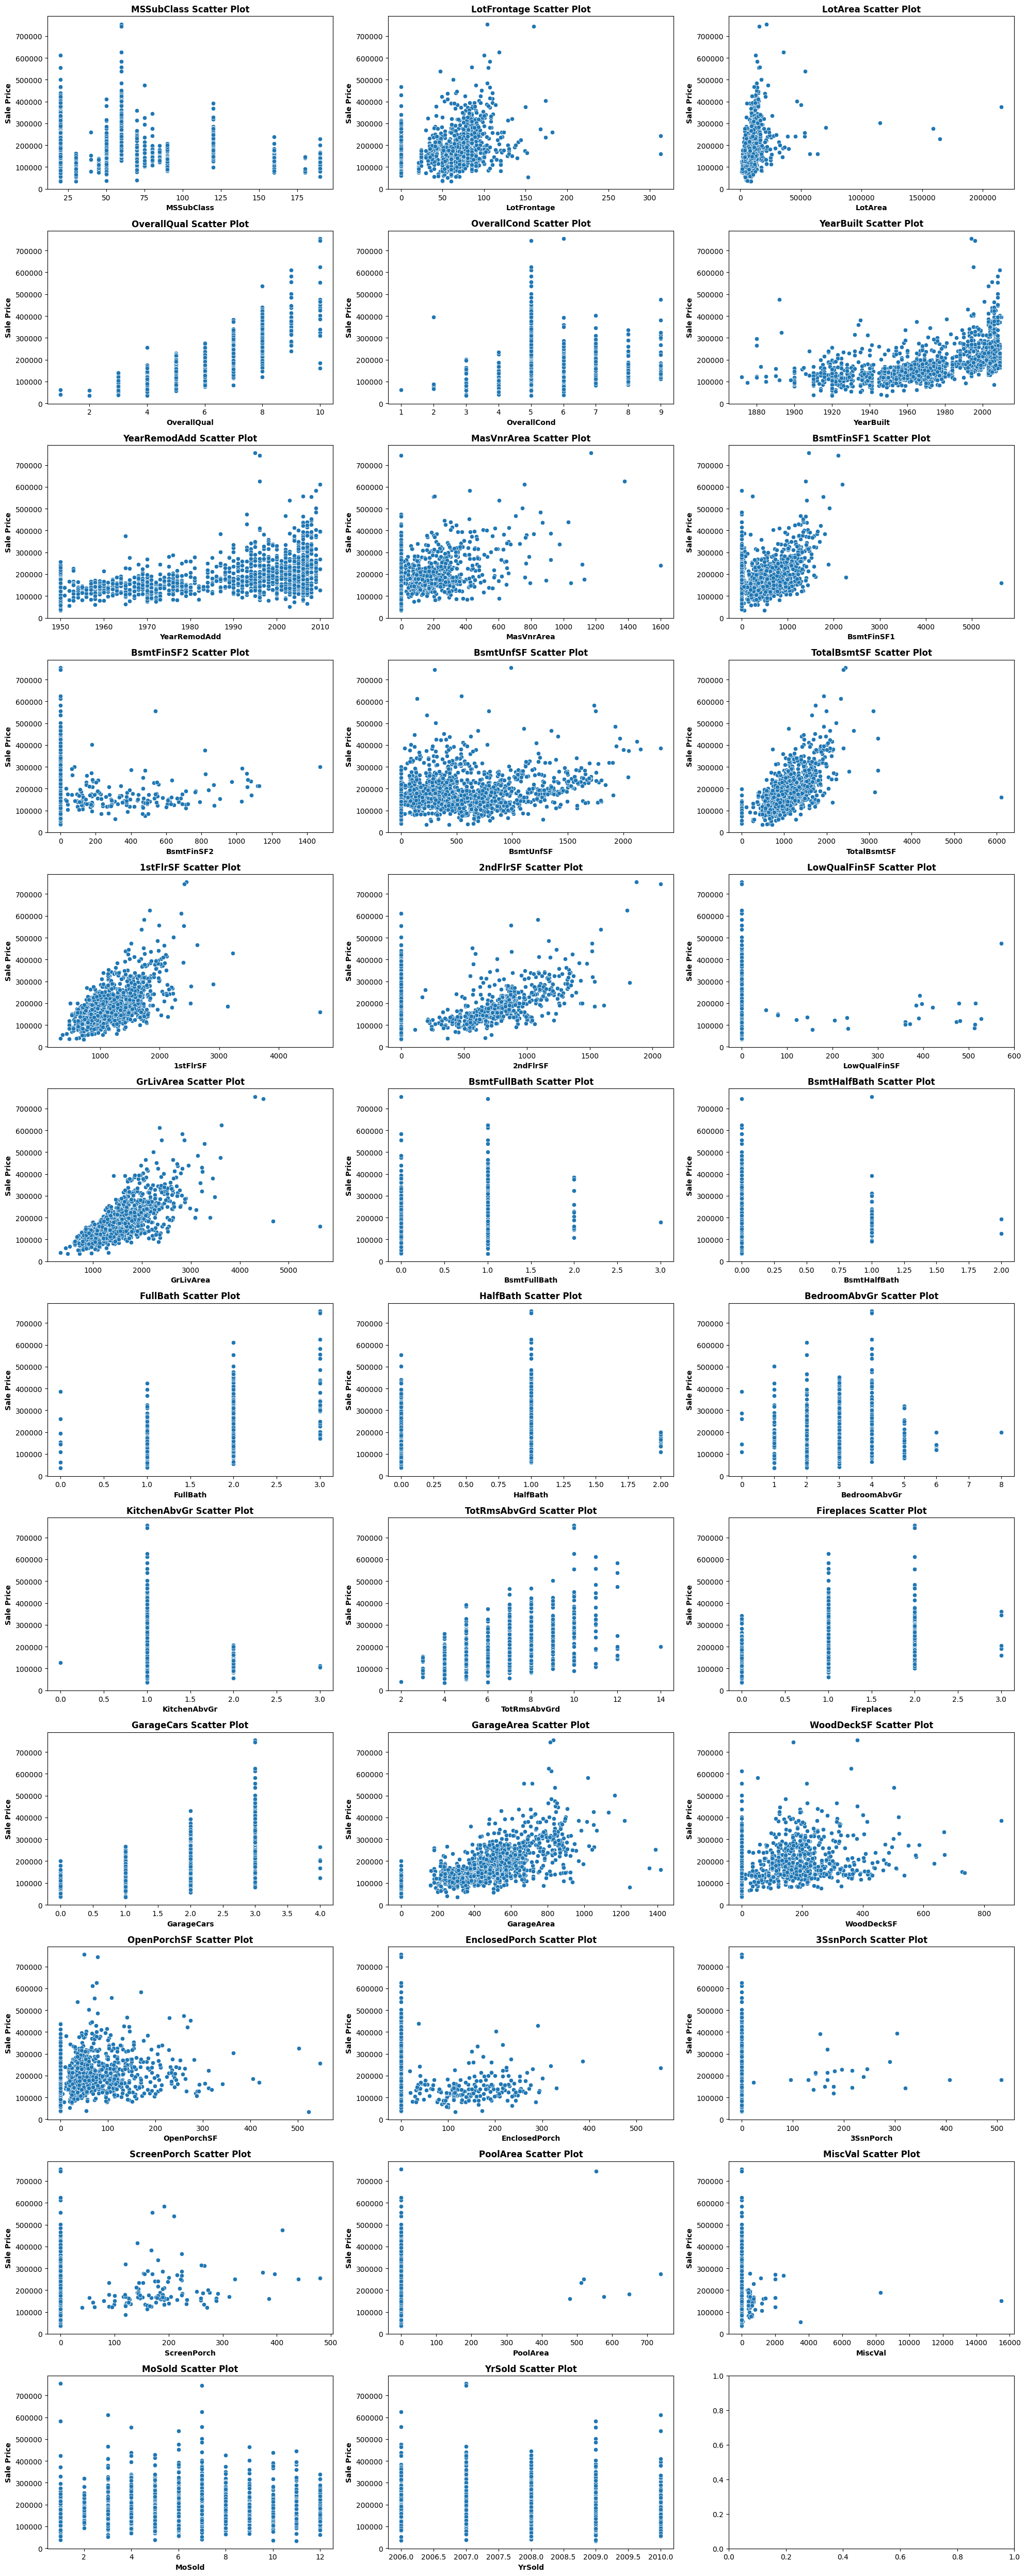

In [12]:
#Scatter distribution of numeric data in relation to SalePrice (looking for linearity vs SalePrice)
plt.clf()
fig, axes = plt.subplots(12,3,figsize=(20, 50))
axes = axes.flatten()

#Dropping the Id Field since I'm only concerned with checking scatter distributions of the training data here
num_chart_data = train_numeric.drop(columns=['Id'])

for i, col in enumerate(num_chart_data.columns):
    if col != 'SalePrice':
        sns.scatterplot(num_chart_data, x=col, y='SalePrice', ax = axes[i])
        axes[i].set_title(col +' Scatter Plot', fontweight='bold')
        axes[i].set_xlabel(col, fontweight='bold')
        axes[i].set_ylabel('Sale Price', fontweight='bold')

plt.tight_layout()
plt.show()

#Scatter Findings (Linear Relationship Indications): LotFrontage, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea

## 3-b. Outlier Handling and Elimination

In [23]:
#Visual inspection for outlier items (in terms of outlier prices paired with other variables), cataloged by index
from scipy import stats
# plt.clf()

# plt.scatter(x='MSSubClass', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='LotFrontage', y='SalePrice', data=train)
# plt.show()
# train.query('LotFrontage > 300')
##-->Drop 935, 1299

# plt.scatter(x='LotArea', y='SalePrice', data=train)
# plt.show()
# train.query('LotArea > 55000')
# stats.zscore(train['LotArea']).sort_values().tail(10) #LotArea outliers do not correspond with SalesPrice Outliers
##-->Drop 250, 314, 336, 707, maybe 1397

# plt.scatter(x='OverallQual', y='SalePrice', data=train)
# plt.show()
# train.query('OverallQual == 10')
##-->Drop maybe 524 and 1299

# plt.scatter(x='OverallCond', y='SalePrice', data=train)
# plt.show()
# train.query('OverallCond == 2')
# train.query('OverallCond == 5 & SalePrice > 700000')
# train.query('OverallCond == 6 & SalePrice > 700000')
##-->Drop 379, 1183, 692

# plt.scatter(x='YearBuilt', y='SalePrice', data=train)
# plt.show()
# train.query('YearBuilt < 1900 & SalePrice > 400000')
##-->Drop 186

# plt.scatter(x='YearRemodAdd', y='SalePrice', data=train)
# plt.show()
# train.query('YearRemodAdd < 1970 & SalePrice > 300000')
##-->Drop 314

# plt.scatter(x='MasVnrArea', y='SalePrice', data=train)
# plt.show()
# train.query('MasVnrArea > 1500')
##-->Drop 298

# plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train)
# plt.show()
# train.query('BsmtFinSF1 > 5000')
##-->Drop 1299 (dup)

# plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train)
# plt.show()
# train.query('BsmtFinSF2 > 400 & SalePrice > 500000')
##-->Drop 441

# plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train)
# plt.show()
# train.query('TotalBsmtSF > 5000')
##-->Drop 1299 (dup)

# plt.scatter(x='1stFlrSF', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='2ndFlrSF', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='LowQualFinSF', y='SalePrice', data=train)
# plt.show()
# train.query('LowQualFinSF > 500')
##-->Drop 186

# plt.scatter(x='GrLivArea', y='SalePrice', data=train)
# plt.show()
# train.query('GrLivArea > 4400')
##-->Drop 524, 1299

# plt.scatter(x='BsmtFullBath', y='SalePrice', data=train)
# plt.show()
# train.query('BsmtFullBath == 3')
##-->Drop 739

# plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train)
# plt.show()
# print(stats.zscore(train['BsmtHalfBath']).unique())
# train.query('BsmtHalfBath == 2')
##-->Drop 598, 955

# plt.scatter(x='FullBath', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='HalfBath', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train)
# plt.show()
# train.query('BedroomAbvGr == 8')
##-->Drop 636

# plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train)
# plt.show()
# train.query('KitchenAbvGr == 3')
##-->Drop 49, 810

# plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train)
# plt.show()
# train.query('TotRmsAbvGrd == 14')
##-->Drop 636

# plt.scatter(x='Fireplaces', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='GarageYrBlt', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='GarageCars', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='GarageArea', y='SalePrice', data=train)
# plt.show()
# train.query('GarageArea > 1200')
##-->Drop 1062, 1191, 1299

# plt.scatter(x='WoodDeckSF', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='OpenPorchSF', y='SalePrice', data=train)
# plt.show()
# train.query('OpenPorchSF > 500')
##-->Drop 496

# plt.scatter(x='EnclosedPorch', y='SalePrice', data=train)
# plt.show()
# train.query('EnclosedPorch > 500')
##-->Drop 198

# plt.scatter(x='3SsnPorch', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='ScreenPorch', y='SalePrice', data=train)
# plt.show()

# plt.scatter(x='PoolArea', y='SalePrice', data=train)
# plt.show()

#Eliminate the outliers with respect to SalePrice
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]
train = train[train.Id.isin(values) == False]

#Re-establish Numeric and Categorical now that indices are removed
train_numeric = train.select_dtypes(include='number')
train_categorical = train.select_dtypes(exclude='number')

## 3-c. Categorical Histograms

<Figure size 640x480 with 0 Axes>

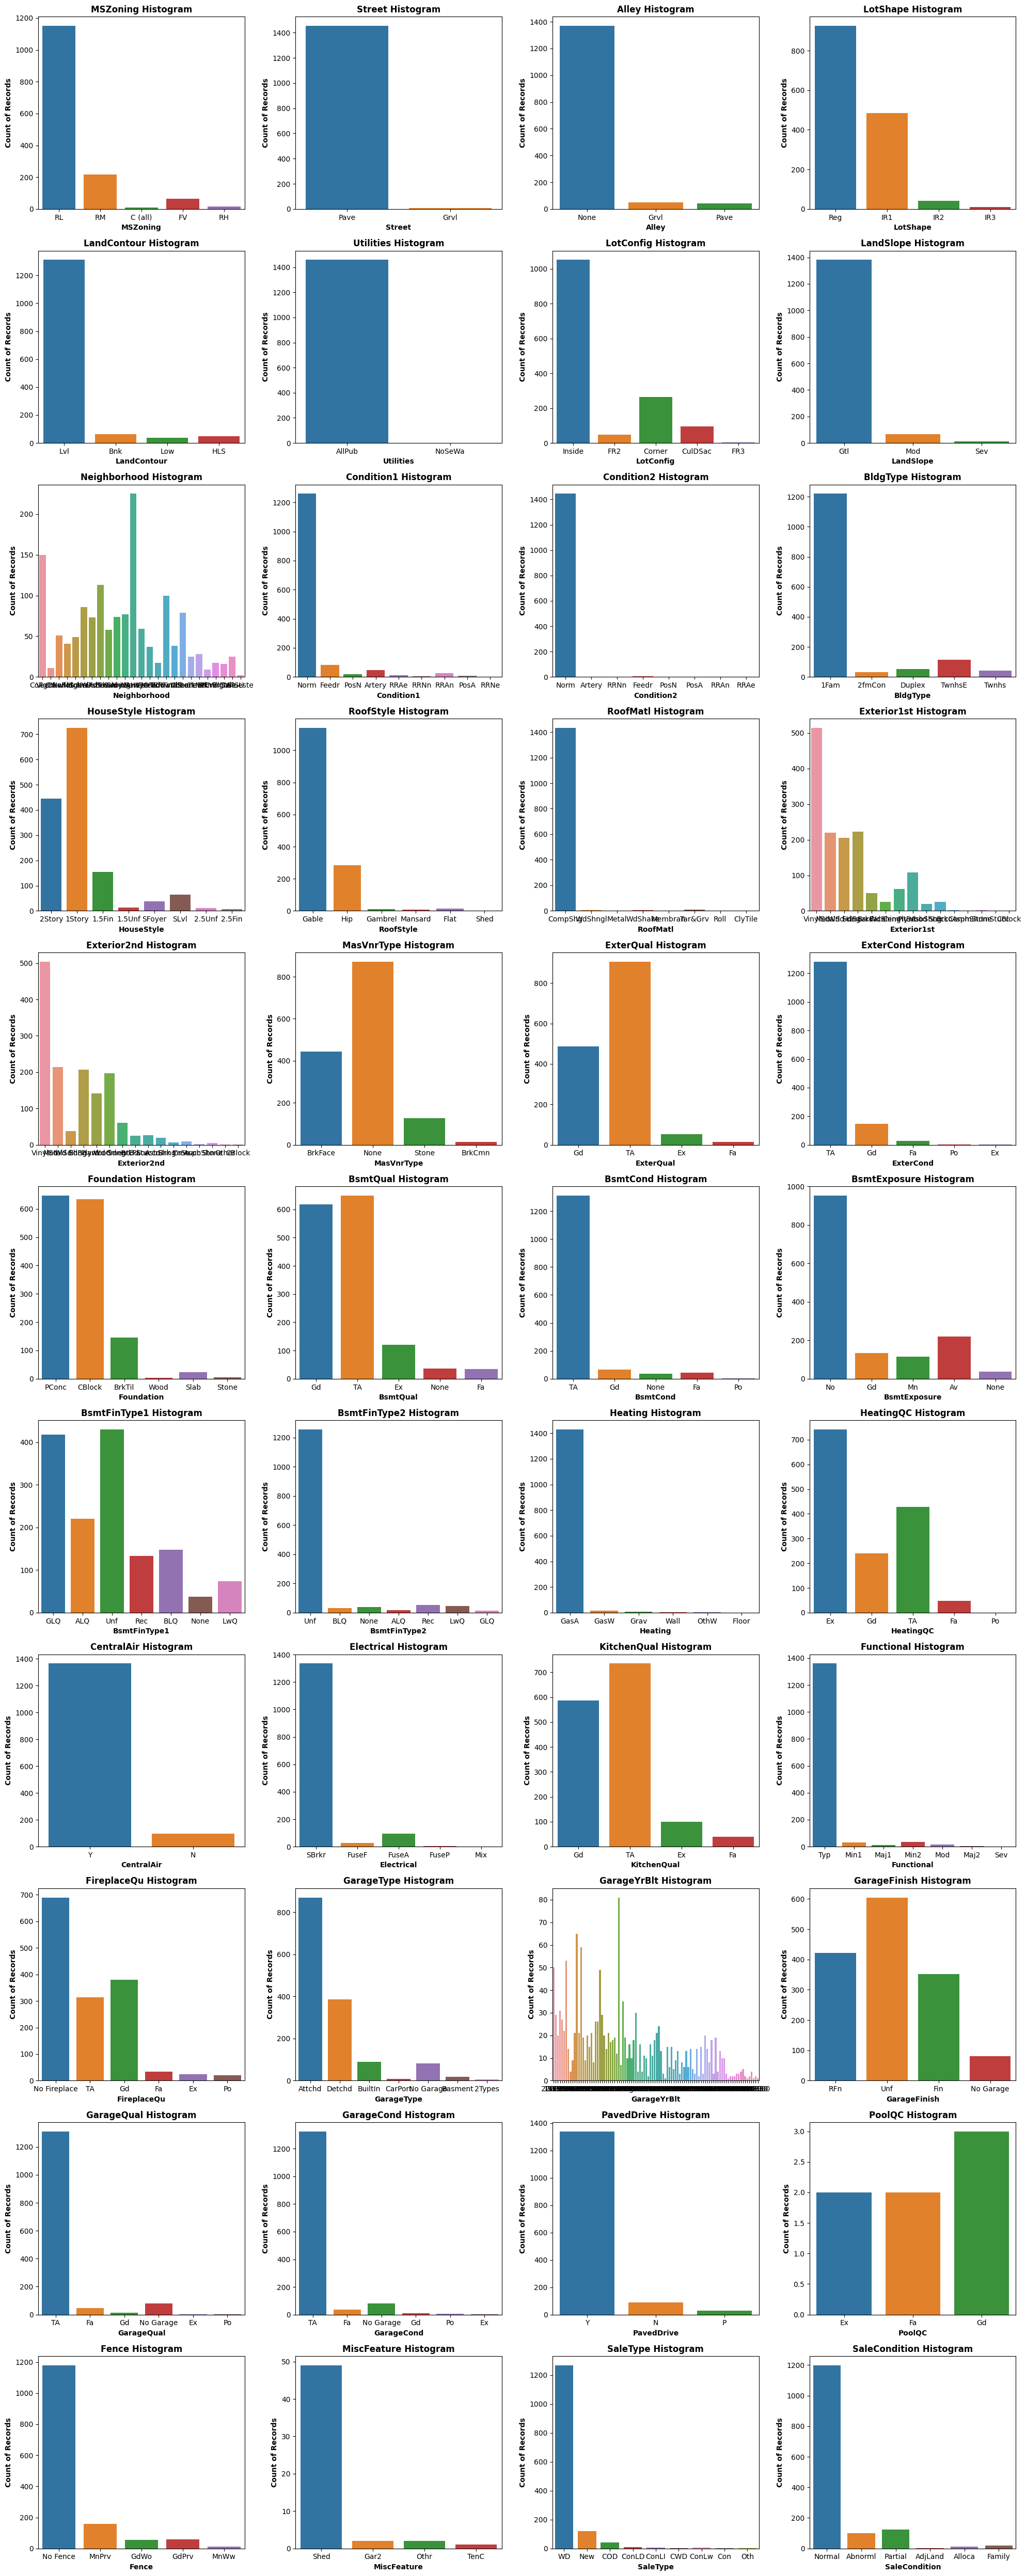

In [14]:
#Histograms for all categorical fields to show distributions after data cleaning
plt.clf()
fig, axes = plt.subplots(11, 4, figsize=(20, 50))
axes = axes.flatten()

# train_categorical.shape #43 columns
for i, col in enumerate(train_categorical.columns):
    sns.countplot(train_categorical, x=col, ax=axes[i], orient='v')
    axes[i].set_title(col + ' Histogram', fontweight='bold')
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel('Count of Records', fontweight='bold')

plt.tight_layout()
plt.show()

#Learned here that Garage Year Built could have been converted to an int instead of object, but would have effected the null case solution

## 3-d. Categorical Correlation Heatmap

<Figure size 640x480 with 0 Axes>

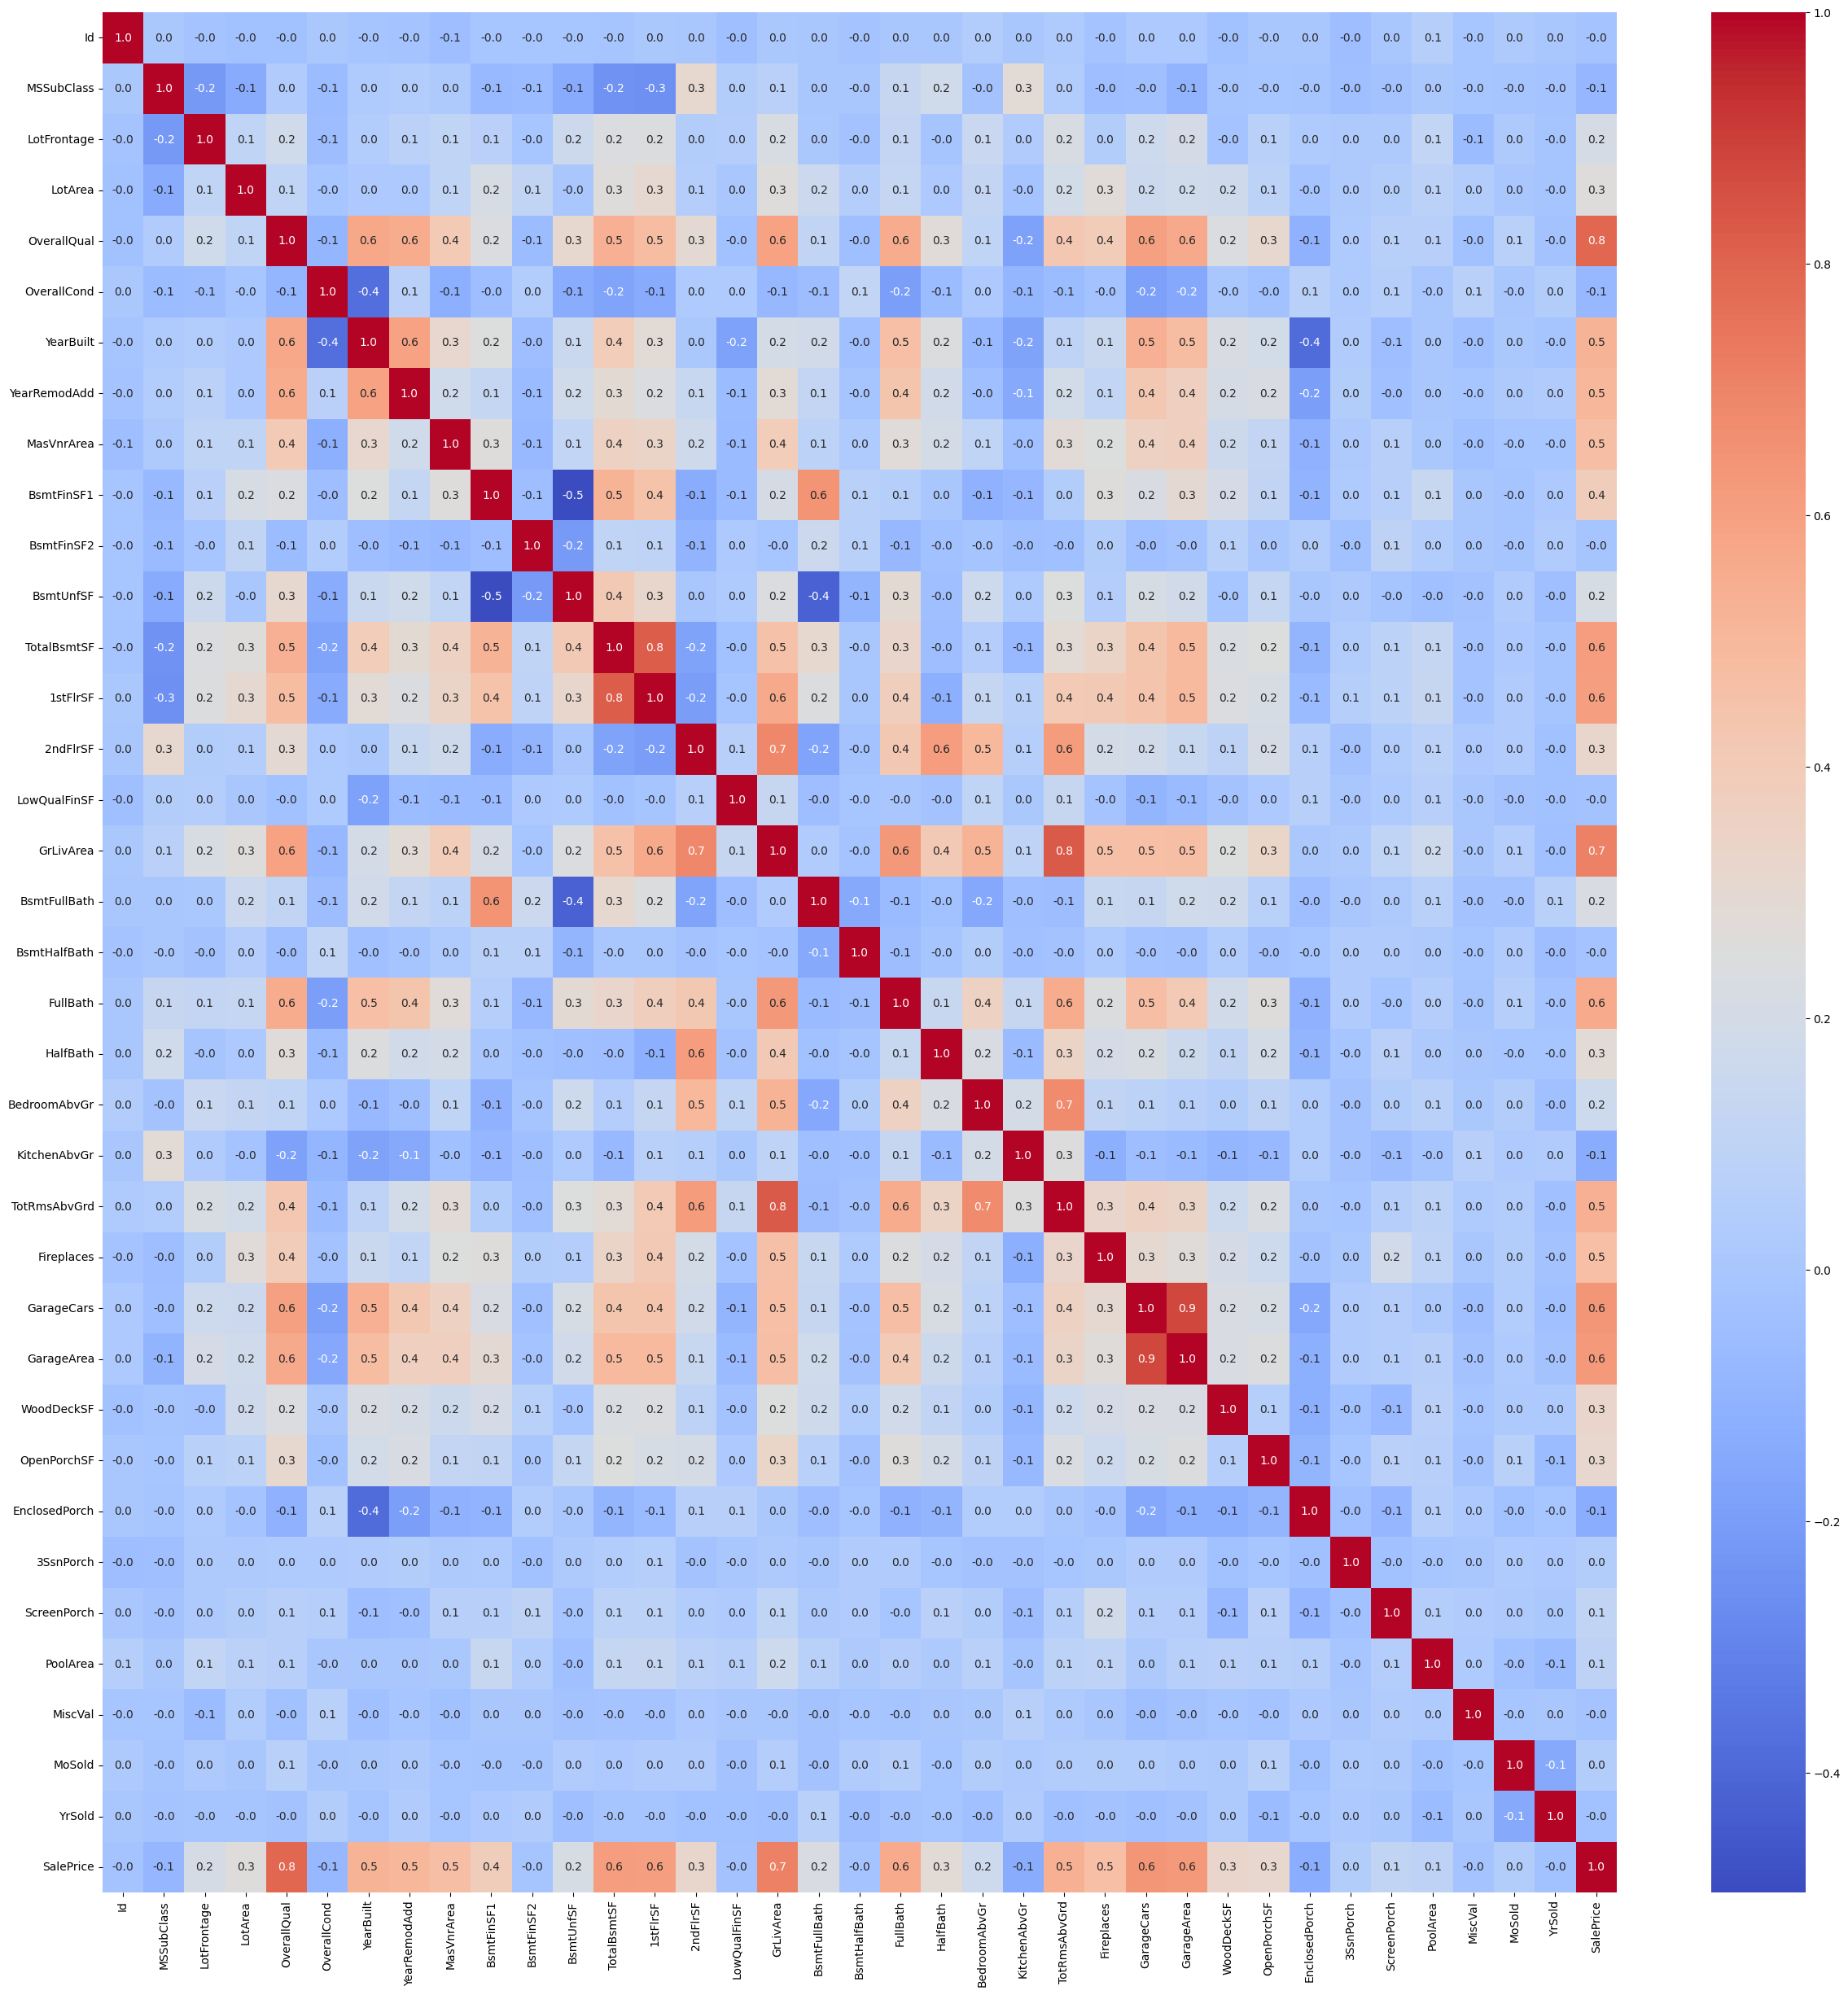

In [15]:
#Create Correlation Map for numeric data points vs. SalePrice
plt.clf()
fig, axes = plt.subplots(figsize=(30, 30))
sns.heatmap(train_numeric.corr(), annot=True, fmt='.1f', cmap='coolwarm')  # Heatmap of correlations
plt.show()

# 4. Preparation for Predictive Models
* VIF Findings / Numerical: Drop Variables from Model (See Excel File): Id, PoolQC, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, YearRemodAdd, GarageCars, YrSold, 1stFlrSF, 2ndFlrSF, LowQualFinSF
* CV Findings with SelectKBest / Categorical: Drop Variables from Model (See Excel File): Alley, Street, MiscFeature, PavedDrive, CentralAir, PoolQC, Utilities
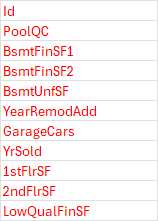
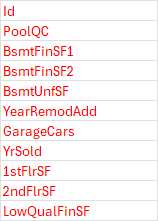
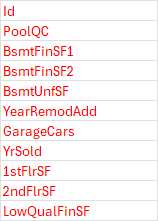
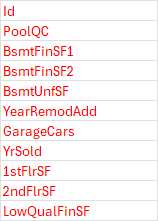
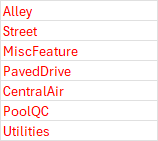
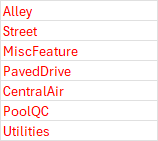
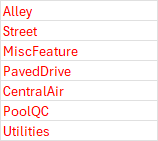
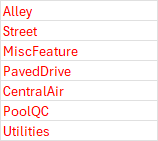

## 4-a. Numeric Feature Multicollinearity Check

In [24]:
#Check v1 multicollinearity using VIF (Variance Inflation Factor)
#Fed results into attached Excel file to determine final variable set
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_numeric.drop(columns=['SalePrice', 'Id'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))

          Feature           VIF
10      BsmtUnfSF           inf
8      BsmtFinSF1           inf
15      GrLivArea           inf
14   LowQualFinSF           inf
13       2ndFlrSF           inf
12       1stFlrSF           inf
11    TotalBsmtSF           inf
9      BsmtFinSF2           inf
34         YrSold  2.218014e+04
6    YearRemodAdd  2.087157e+04
5       YearBuilt  1.731533e+04
22   TotRmsAbvGrd  8.597748e+01
3     OverallQual  6.825844e+01
4     OverallCond  4.172712e+01
21   KitchenAbvGr  3.890510e+01
24     GarageCars  3.703231e+01
25     GarageArea  3.176759e+01
20   BedroomAbvGr  3.160926e+01
18       FullBath  2.758722e+01
33         MoSold  6.696254e+00
2         LotArea  6.412455e+00
0      MSSubClass  4.750609e+00
1     LotFrontage  4.649145e+00
16   BsmtFullBath  3.810594e+00
19       HalfBath  3.454055e+00
23     Fireplaces  2.929693e+00
26     WoodDeckSF  1.929527e+00
27    OpenPorchSF  1.839220e+00
7      MasVnrArea  1.804124e+00
28  EnclosedPorch  1.438765e+00
17   Bsm

In [25]:
#Check v2 multicollinearity using VIF (Variance Inflation Factor)
#Fed results into attached Excel file to determine final variable set
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_numeric.drop(columns=['SalePrice', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'YearRemodAdd', 'GarageCars', 'Id', 'YrSold'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))

          Feature         VIF
5       YearBuilt  111.737769
15   TotRmsAbvGrd   84.890299
8       GrLivArea   64.027680
3     OverallQual   59.567141
14   KitchenAbvGr   35.043187
13   BedroomAbvGr   29.849656
4     OverallCond   28.964806
11       FullBath   21.615302
7     TotalBsmtSF   16.575220
17     GarageArea   11.025698
25         MoSold    6.688958
2         LotArea    6.346313
1     LotFrontage    4.611984
0      MSSubClass    4.488030
16     Fireplaces    2.769665
12       HalfBath    2.523367
9    BsmtFullBath    2.135472
18     WoodDeckSF    1.911982
19    OpenPorchSF    1.816175
6      MasVnrArea    1.745227
20  EnclosedPorch    1.259762
22    ScreenPorch    1.173507
10   BsmtHalfBath    1.138004
21      3SsnPorch    1.035689
24        MiscVal    1.030086
23       PoolArea    1.027073


## 4-b. Categoric Feature Correlation Check

In [26]:
#Create X and y variables for correlation and SelectKBest review
X = train_categorical.copy() #Make a copy of the Categorical data set
X_encoded = pd.get_dummies(train_categorical, drop_first=True) # Drop first category to avoid multicollinearity
y = train['SalePrice'] #Set the SalePrice variable for ANOVA analysis

#Check for correlations in encoded dataset
corr_matrix = X_encoded.corr()
threshold = 0.9
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs["Correlation"]) > threshold]
print(high_corr_pairs)

#No correlating pairs found that would harm performance

                     Feature1                Feature2  Correlation
19636         RoofStyle_Gable           RoofStyle_Hip    -0.935921
22987      Exterior1st_CBlock      Exterior2nd_CBlock     1.000000
23218     Exterior1st_CemntBd     Exterior2nd_CmentBd     0.973740
23905     Exterior1st_MetalSd     Exterior2nd_MetalSd     0.972791
24808     Exterior1st_VinylSd     Exterior2nd_VinylSd     0.977268
29469            ExterQual_Gd            ExterQual_TA    -0.912986
32006           BsmtQual_None           BsmtCond_None     1.000000
32012           BsmtQual_None       BsmtExposure_None     0.986402
32016           BsmtQual_None       BsmtFinType1_None     1.000000
32022           BsmtQual_None       BsmtFinType2_None     0.986402
32570           BsmtCond_None       BsmtExposure_None     0.986402
32574           BsmtCond_None       BsmtFinType1_None     1.000000
32580           BsmtCond_None       BsmtFinType2_None     0.986402
33663       BsmtExposure_None       BsmtFinType1_None     0.98

## 4-c. Feature Importance Check (What moves the needle)

In [19]:
#Use SelectKBest for Categorical feature selection
#!!!! Commenting this section out since it takes so long to run and don't want it to begin on notebook startup!!!!

# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# from tqdm import tqdm  # Import tqdm for progress bar

# # Define range of k values to test
# k_values = np.arange(3, 200, 2)  # Testing k from 3 to 19 in steps of 2
# cv_scores = []

# for k in tqdm(k_values, desc="Testing k values", unit='k'): #progress bar feature!!!! =)
#     selector = SelectKBest(score_func=f_classif, k=k)
#     X_new = selector.fit_transform(X_encoded, y)
    
#     # Evaluate using cross-validation
#     score = cross_val_score(RandomForestRegressor(), X_new, y, cv=5).mean()
#     cv_scores.append(score)

# # Plot model accuracy vs. number of selected features (k)
# plt.figure(figsize=(10, 5))
# plt.plot(k_values, cv_scores, marker='o', linestyle='-')
# plt.xlabel("Number of Selected Features (k)")
# plt.ylabel("Cross-Validation Score")
# plt.title("Optimal Number of Features Selection")
# plt.show()

# # Print the best k value
# best_k = k_values[np.argmax(cv_scores)]
# print(f"Optimal number of features (k): {best_k}")

# The feature (k) vs. CV score seems to begin plataeuing at k=25, even though incremental improvals do continue to occur.
# Could go as high as k=40, but risk of overfit would be a concern when using k higher than 40

In [27]:
#Print aggregated score list to finish cataloging features for keep / drop in Excel file
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=25) #Start with choosing the top 5 features
X_new = selector.fit_transform(X_encoded,y)
feature_scores = pd.DataFrame({'Feature': X_encoded.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

feature_scores['BaseFeature'] = feature_scores['Feature'].str.split('_').str[0]
aggregated_scores = feature_scores.groupby('BaseFeature')['Score'].sum().reset_index()
aggregated_scores = aggregated_scores.sort_values(by='Score', ascending=False)

print(aggregated_scores)

      BaseFeature      Score
11      ExterCond        inf
40  SaleCondition        inf
23    GarageYrBlt        inf
41       SaleType        inf
14    Exterior2nd        inf
9      Condition2        inf
13    Exterior1st        inf
35   Neighborhood  32.063934
2        BsmtCond   8.154121
17     Foundation   7.928129
26     HouseStyle   7.792046
22     GarageType   7.742891
4    BsmtFinType1   7.081882
12      ExterQual   6.714024
6        BsmtQual   6.652623
3    BsmtExposure   6.075397
21     GarageQual   6.046040
24        Heating   5.750451
5    BsmtFinType2   5.692616
16    FireplaceQu   5.647930
8      Condition1   5.634311
27    KitchenQual   5.585517
31       LotShape   5.508646
19     GarageCond   5.241380
39      RoofStyle   5.085228
32       MSZoning   4.854527
33     MasVnrType   4.589488
10     Electrical   4.484132
30      LotConfig   4.448897
20   GarageFinish   4.184113
18     Functional   4.085318
38       RoofMatl   4.007835
25      HeatingQC   3.413607
1        BldgT

## 4-d. Additional Feature Engineering

In [28]:
#Create 2 new variables to reduce complexity of numeric variables in models
train['PorchArea'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
test['PorchArea'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

train['TotalBath'] = train['BsmtFullBath'] + .5*train['BsmtHalfBath'] + train['FullBath'] + .5*train['HalfBath']
test['TotalBath'] = test['BsmtFullBath'] + .5*test['BsmtHalfBath'] + test['FullBath'] + .5*test['HalfBath']

train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

train['HouseRemodelAge'] = train['YrSold'] - train['YearRemodAdd']
test['HouseRemodelAge'] = test['YrSold'] - test['YearRemodAdd']

train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']
test['TotalSF'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']

train['TotalArea'] = train['GrLivArea'] + train['TotalBsmtSF']
test['TotalArea'] = test['GrLivArea'] + test['TotalBsmtSF']

# Decided to do positive selection in section 5 vs. dropping from the data set for easier tracking / retesting of the data flow and integration with the working Excel file
# train.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)
# test.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)

## 4-e. SalePrice Normalization

<Axes: xlabel='SalePrice', ylabel='Count'>

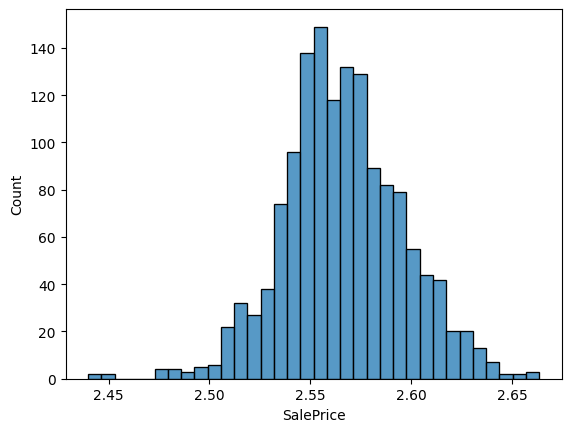

In [31]:
#SalePrice is skewed right, would be a good idea to use a log transform to the variable
# sns.histplot(train, x=train['SalePrice'])
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train, x=train['SalePrice']) #Check graph again, definitely more normal curve

# 5. Model Fitting

## 5-a. Pipeline Preparation

In [33]:
ord_cols = ['ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', \
            'ExterQual', 'BsmtExposure', 'GarageQual', 'FireplaceQu', \
            'KitchenQual', 'LotShape', 'GarageFinish', 'Functional', \
            'HeatingQC', 'LandContour', 'LandSlope']
nom_cols = ['Condition2', 'Exterior1st', 'Exterior2nd', 'SaleType', \
            'Neighborhood', 'Foundation', 'GarageType', 'HouseStyle', \
            'Heating', 'BsmtFinType2', 'Condition1', 'RoofMatl', 'GarageCond', \
            'MSZoning', 'RoofStyle', 'MasVnrType', 'Electrical', 'LotConfig', \
            'BldgType', 'Fence', 'SaleCondition']

num_cols = train.select_dtypes(include='number').columns
num_cols = num_cols.drop('SalePrice')

In [35]:
#Imports for this step
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

#Create num pipeline
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Create Ordinal Pipeline (for Ordinal Values)
ord_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

#Create One Hot Encoding Pipeline (for Nominal Values)
nom_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



In [ ]:
from sklearn.compose import make_column_transformer, ColumnTransformer


## 5-a. Updated Train and Test DFs

In [ ]:
#Combine train and test data sets

train_fin = train.copy()[['Condition2', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'SaleType', 'Neighborhood', \
                          'BsmtCond', 'Foundation', 'GarageType', 'HouseStyle', 'BsmtFinType1', 'BsmtQual', \
                          'ExterQual', 'Heating', 'BsmtExposure', 'BsmtFinType2', 'GarageQual', 'FireplaceQu', \
                          'Condition1', 'KitchenQual', 'RoofMatl', 'LotShape', 'GarageCond', 'MSZoning', 'RoofStyle', \
                          'MasVnrType', 'Electrical', 'LotConfig', 'GarageFinish', 'Functional', 'HeatingQC', 'LandContour', \
                          'BldgType', 'Fence', 'LandSlope', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual', 'OverallCond', \
                          'LotFrontage', 'GarageArea', 'MoSold', 'MSSubClass', 'Fireplaces', 'LotArea', 'WoodDeckSF', 'MasVnrArea', \
                          'PoolArea', 'MiscVal', 'SaleCondition', 'PorchArea', 'TotalBath', 'HouseAge', 'HouseRemodelAge', 'TotalSF', 'TotalArea', 'SalePrice']]
test_fin = test.copy()[['Condition2', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'SaleType', 'Neighborhood', \
                          'BsmtCond', 'Foundation', 'GarageType', 'HouseStyle', 'BsmtFinType1', 'BsmtQual', \
                          'ExterQual', 'Heating', 'BsmtExposure', 'BsmtFinType2', 'GarageQual', 'FireplaceQu', \
                          'Condition1', 'KitchenQual', 'RoofMatl', 'LotShape', 'GarageCond', 'MSZoning', 'RoofStyle', \
                          'MasVnrType', 'Electrical', 'LotConfig', 'GarageFinish', 'Functional', 'HeatingQC', 'LandContour', \
                          'BldgType', 'Fence', 'LandSlope', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual', 'OverallCond', \
                          'LotFrontage', 'GarageArea', 'MoSold', 'MSSubClass', 'Fireplaces', 'LotArea', 'WoodDeckSF', 'MasVnrArea', \
                          'PoolArea', 'MiscVal', 'SaleCondition', 'PorchArea', 'TotalBath', 'HouseAge', 'HouseRemodelAge', 'TotalSF', 'TotalArea', 'SalePrice']]

test_fin['SalePrice'] = np.NaN #Add SalePrice column to test data to allow for concat

#confirm shape is as expected
print('Data Shape Confirmation:')
print(train_fin.shape)
print(test_fin.shape)
print('\n\n')

train_fin['train_test'] = 1 #training data labeled as 1
test_fin['train_test'] = 0 #test data labeled as 0

#Combine data from test and train for encoding and standardizing process
all_data_fin = pd.concat([train_fin, test_fin], axis=0)
print('Data Shape after Concat:')
print(all_data_fin.shape)
print('\n\n')

#     score = cross_val_score(RandomForestRegressor(), X_new, y, cv=5).mean()

## 5-b. 

In [ ]:
#Use get_dummies to encode Categorical Data, then created scaled data set as duplicate

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

all_dummies_fin = pd.get_dummies(all_data_fin, columns=['GarageYrBlt', 'Condition2', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'SaleType', \
                                                        'Neighborhood', 'BsmtCond', 'Foundation', 'GarageType', 'HouseStyle', 'BsmtFinType1', \
                                                        'BsmtQual', 'ExterQual', 'Heating', 'BsmtExposure', 'BsmtFinType2', 'GarageQual', 'FireplaceQu', \
                                                        'Condition1', 'KitchenQual', 'RoofMatl', 'LotShape', 'GarageCond', 'MSZoning', 'RoofStyle', \
                                                        'MasVnrType', 'Electrical', 'LotConfig', 'GarageFinish', 'Functional', 'HeatingQC', 'LandContour', \
                                                        'BldgType', 'Fence', 'LandSlope'])

all_dummies_fin_scaled = all_dummies_fin.copy()
all_dummies_fin_scaled[['BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt', 'GrLivArea', \
                        'OverallQual', 'OverallCond', 'LotFrontage', 'TotalBsmtSF', \
                        'GarageArea', 'MoSold', 'MSSubClass', 'Fireplaces', 'LotArea', \
                        'WoodDeckSF', 'MasVnrArea', 'PoolArea', 'MiscVal', 'PorchArea', 'TotalBath']] = scale.fit_transform(all_dummies_fin_scaled[['BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt', 'GrLivArea', \
                                                                                                                                                    'OverallQual', 'OverallCond', 'LotFrontage', 'TotalBsmtSF', \
                                                                                                                                                    'GarageArea', 'MoSold', 'MSSubClass', 'Fireplaces', 'LotArea', \
                                                                                                                                                    'WoodDeckSF', 'MasVnrArea', 'PoolArea', 'MiscVal', 'PorchArea', 'TotalBath']])

#verifying functionality of dummies call
#print(all_dummies_fin.columns)

In [ ]:
#Make scaled and non-scaled versions of the data sets for testing
X_train = all_dummies_fin[all_dummies_fin['train_test']==1].drop(['train_test'], axis=1) #1 for Training
X_test = all_dummies_fin[all_dummies_fin['train_test']==0].drop(['train_test'], axis=1) #0 for Test

X_train_scaled = all_dummies_fin_scaled[all_dummies_fin_scaled['train_test']==1].drop(['SalePrice','train_test'], axis=1) #1 for Training
X_test_scaled = all_dummies_fin_scaled[all_dummies_fin_scaled['train_test']==0].drop(['SalePrice','train_test'], axis=1) #0 for Test

y_train = all_data_fin[all_data_fin['train_test']==1]['SalePrice']

In [ ]:
#Modeling Imports
# import joblib
# from tqdm import tqdm  # Import tqdm for progress bar
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

In [ ]:
#Test LogReg with Scaling
# logreg = LogisticRegression(max_iter=2000)


# cv = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
# print('Logistic Regression CrossVal (With Scaling) Score: ' +(cv.mean()*100).round(2).astype(str) + '%')

#Logistic Regression CrossVal (With Scaling) Score: 1.37%

In [ ]:
#Test Naive Bayes with Scaling
# gnb = GaussianNB()

# cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
# print('GaussianNB CrossVal (With Scaling) Score: ' +(cv.mean()*100).round(2).astype(str) + '%')

#GaussianNB CrossVal (With Scaling) Score: 72.12%

In [ ]:
#Test Decision Tree without Scaling
# dt = tree.DecisionTreeClassifier(random_state = 1)

# cv = cross_val_score(dt, X_train, y_train, cv=5)
# print('Decision Tree CrossVal (No Scaling) Score: ' +(cv.mean()*100).round(2).astype(str) + '%')

#Try 1: Decision Tree CrossVal (No Scaling) Score: 49.25%
#Try 2: Decision Tree CrossVal (No Scaling) Score: 49.93%

In [ ]:
#Test Decision Tree with Scaling
# dt = tree.DecisionTreeClassifier(random_state = 1)

# cv = cross_val_score(dt, X_train_scaled, y_train, cv=5)
# print('Decision Tree CrossVal (With Scaling) Score: ' +(cv.mean()*100).round(2).astype(str) + '%')

#Try 1: Decision Tree CrossVal (No Scaling) Score: 49.25%
#Try 2: Decision Tree CrossVal (No Scaling) Score: 49.93%

In [ ]:
#Test K Nearest Neighbor with Scaling
# knn = KNeighborsClassifier()

# cv = cross_val_score(knn, X_train_scaled, y_train, cv=5)
# print('K Nearest Neighbor CrossVal (With Scaling) Score: ' +(cv.mean()*100).round(2).astype(str) + '%')

#Try 1: K Nearest Neighbor CrossVal (With Scaling) Score: 56.78%
#Try 2: K Nearest Neighbor CrossVal (With Scaling) Score: 56.71%

In [ ]:
#Test Support Vector Classifier (SVM)
# svc = SVC(probability=True)

# cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
# print('Support Vector Classifier CrossVal (With Scaling) Score: ' +(cv.mean()*100).round(2).astype(str) + '%')

#Support Vector Classifier CrossVal (With Scaling) Score: 2.67%

In [ ]:
pd.set_option('display.max_rows', 50)
print(X_test_scaled.isnull().sum())

X_test_scaled.fillna(0, inplace=True) #Test data had some null values that needed to be dealt with for this first run, will integrate into code further up during next session

In [ ]:
#Naive Bayes Prediction (No Tuning)
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predictions = gnb.predict(X_test_scaled)

In [ ]:
output = pd.DataFrame({
    'Id': test.Id,  # Adjust based on your dataset
    'SalePrice': predictions
})

output.to_csv('submission.csv', index=False)
print('file saved')